Clustering Progress: 100%|██████████| 672/672 [05:34<00:00,  2.01it/s]


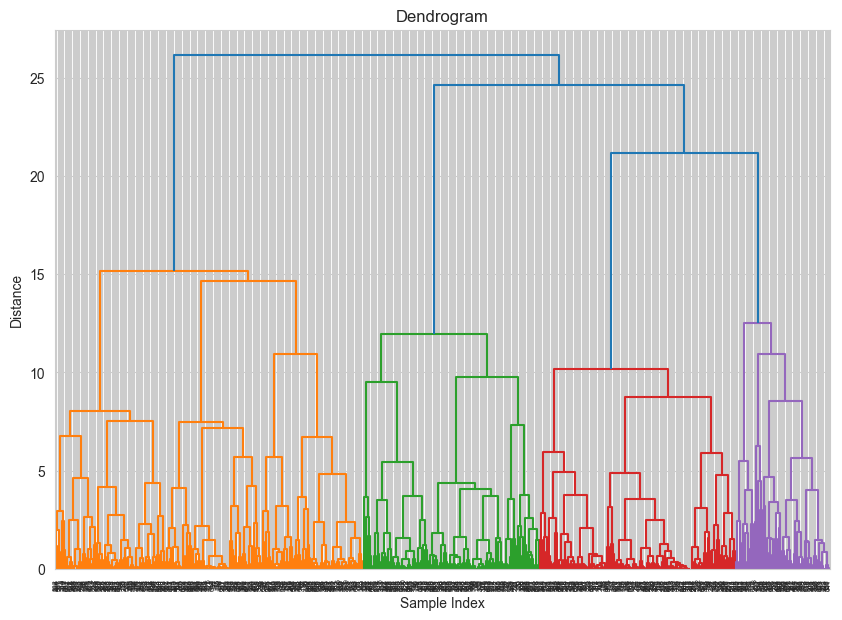

Silhouette Coefficient: 0.3921
Calinski-Harabasz Score: 14.1415
Davies-Bouldin Score: 0.7101


In [41]:
import pandas as pd
import numpy as np
from scipy.spatial.distance import pdist, squareform
from scipy.cluster.hierarchy import linkage, dendrogram
import matplotlib.pyplot as plt
from tqdm import tqdm  # 导入tqdm

# 读取CSV文件
file_path = 'factor_scores.csv'
df = pd.read_csv(file_path)

# 获取数据特征
X = df.values

# 计算距离矩阵
def compute_distance_matrix(X):
    return squareform(pdist(X, metric='euclidean'))

# 层次聚类函数
def hierarchical_clustering(X, num_clusters=4):
    # 计算距离矩阵
    dist_matrix = compute_distance_matrix(X)
    
    # 初始化每个数据点为独立簇
    clusters = [[i] for i in range(len(X))]
    
    # 聚类过程：直到簇的数量降到目标数量
    with tqdm(total=len(X) - num_clusters, desc="Clustering Progress") as pbar:
        while len(clusters) > num_clusters:
            # 查找最小的距离（即最相似的两个簇）
            min_dist = float('inf')
            merge_i, merge_j = -1, -1
            
            for i in range(len(clusters)):
                for j in range(i+1, len(clusters)):
                    dist = np.mean(dist_matrix[clusters[i], :][:, clusters[j]])
                    if dist < min_dist:
                        min_dist = dist
                        merge_i, merge_j = i, j
            
            # 合并这两个簇
            clusters[merge_i].extend(clusters[merge_j])
            del clusters[merge_j]
            
            # 更新进度条
            pbar.update(1)
    
    return clusters

# 执行层次聚类
clusters = hierarchical_clustering(X, num_clusters=4)

# 将聚类标签添加到数据中
labels = np.zeros(X.shape[0])
for i, cluster in enumerate(clusters):
    for idx in cluster:
        labels[idx] = i

# 将标签列添加到原始数据
df['Cluster'] = labels.astype(int)


# 绘制树状图
def plot_dendrogram(Z):
    plt.figure(figsize=(10, 7))
    dendrogram(Z)
    plt.title('Dendrogram')
    plt.xlabel('Sample Index')
    plt.ylabel('Distance')
    plt.show()

# 使用SciPy的linkage函数生成树状图数据
Z = linkage(X, method='ward')  # 使用Ward方法
plot_dendrogram(Z)

# 计算聚类质量指标
from sklearn.metrics import silhouette_score, calinski_harabasz_score, davies_bouldin_score

# 计算Silhouette Coefficient
silhouette = silhouette_score(X, labels)
print(f"Silhouette Coefficient: {silhouette:.4f}")

# 计算Calinski-Harabasz Score
calinski_harabasz = calinski_harabasz_score(X, labels)
print(f"Calinski-Harabasz Score: {calinski_harabasz:.4f}")

# 计算Davies-Bouldin Score
davies_bouldin = davies_bouldin_score(X, labels)
print(f"Davies-Bouldin Score: {davies_bouldin:.4f}")


In [42]:
# 计算每一类的平均值
class_means = df.groupby('Cluster').mean()

# 输出每一类的平均值
print("每一类的平均值：")
print(class_means)



每一类的平均值：
           健康生活习惯      注重品质   创新与消费倾向      规律作息
Cluster                                        
0        0.003521  0.028703  0.006098  0.034236
1       -0.282890 -2.548407 -0.992774 -2.360083
2       -2.350661  1.872629  1.129339 -2.626812
3        1.982128 -3.178917  1.752682 -3.687869


In [43]:
# 计算Silhouette Coefficient
silhouette = silhouette_score(X, labels)
print(f"Silhouette Coefficient: {silhouette:.4f}")

# 计算Calinski-Harabasz Score
calinski_harabasz = calinski_harabasz_score(X, labels)
print(f"Calinski-Harabasz Score: {calinski_harabasz:.4f}")

# 计算Davies-Bouldin Score
davies_bouldin = davies_bouldin_score(X, labels)
print(f"Davies-Bouldin Score: {davies_bouldin:.4f}")


Silhouette Coefficient: 0.3921
Calinski-Harabasz Score: 14.1415
Davies-Bouldin Score: 0.7101


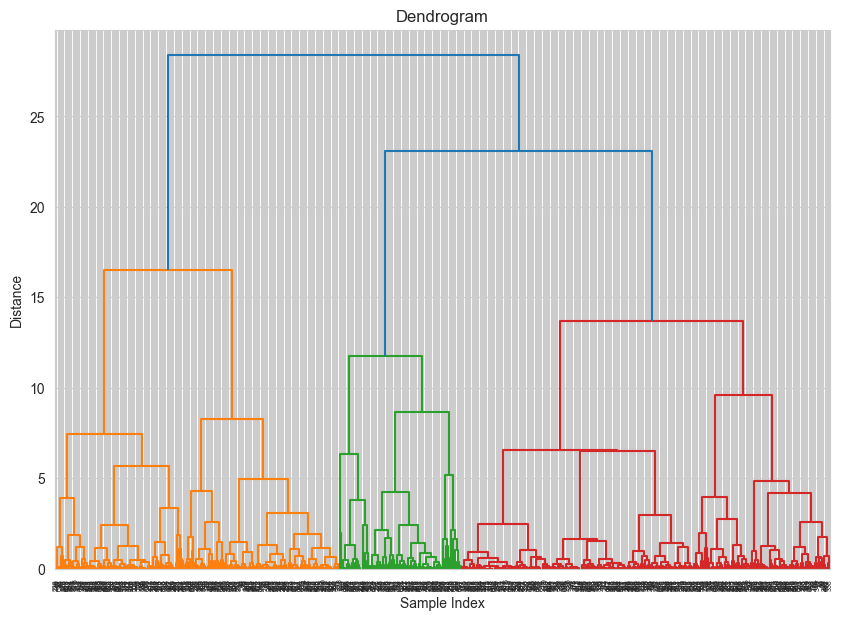

Silhouette Coefficient: 0.3086
Calinski-Harabasz Score: 314.5132
Davies-Bouldin Score: 0.9743


In [47]:
import pandas as pd
import numpy as np
from scipy.cluster.hierarchy import linkage, dendrogram
from sklearn.metrics import silhouette_score, calinski_harabasz_score, davies_bouldin_score
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

# 读取CSV文件
file_path = 'factor_scores.csv'
df = pd.read_csv(file_path)

# 获取数据特征
X = df.values

# 数据标准化
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# PCA降维到2D，降低维度以提高聚类效果
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# 使用scipy的linkage函数进行层次聚类
Z = linkage(X_pca, method='ward', metric='euclidean')  # 使用ward方法进行聚类

# 生成树状图
plt.figure(figsize=(10, 7))
dendrogram(Z)
plt.title("Dendrogram")
plt.xlabel("Sample Index")
plt.ylabel("Distance")
plt.show()

# 根据树状图选择聚类数（例如4类）
from scipy.cluster.hierarchy import fcluster
labels = fcluster(Z, t=4, criterion='maxclust')

# 将聚类标签添加到原始数据中
df['Cluster'] = labels

# 输出带标签的数据
df.to_csv('optimized_clustered_factor_scores.csv', index=False)

# 计算聚类质量指标
silhouette = silhouette_score(X_pca, labels)
calinski_harabasz = calinski_harabasz_score(X_pca, labels)
davies_bouldin = davies_bouldin_score(X_pca, labels)

# 打印评价指标
print(f"Silhouette Coefficient: {silhouette:.4f}")
print(f"Calinski-Harabasz Score: {calinski_harabasz:.4f}")
print(f"Davies-Bouldin Score: {davies_bouldin:.4f}")


In [48]:
# 打印评价指标
print(f"Silhouette Coefficient: {silhouette:.4f}")
print(f"Calinski-Harabasz Score: {calinski_harabasz:.4f}")
print(f"Davies-Bouldin Score: {davies_bouldin:.4f}")


Silhouette Coefficient: 0.3086
Calinski-Harabasz Score: 314.5132
Davies-Bouldin Score: 0.9743


In [49]:
# 打印每个类别的数量
cluster_counts = df['Cluster'].value_counts()

# 输出类别数量
print("每个类别的数量：")
print(cluster_counts)


每个类别的数量：
Cluster
4    321
2    134
1    114
3    107
Name: count, dtype: int64


C:\Users\Samual\AppData\Local\Temp\ipykernel_3996\1140991583.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(x='Cluster', data=df, palette="viridis")


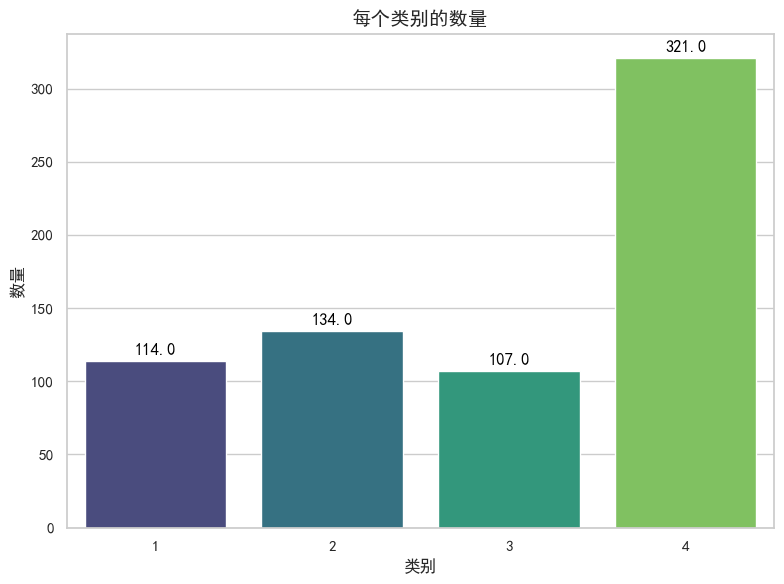

In [52]:
import matplotlib.pyplot as plt
import seaborn as sns

# 绘制条形图
plt.figure(figsize=(8, 6))
sns.set(style="whitegrid")  # 设置图表风格
plt.rcParams['font.sans-serif'] = ['SimHei']  # 显示中文
plt.rcParams['axes.unicode_minus'] = False  # 正常显示负号

# 创建条形图
ax = sns.countplot(x='Cluster', data=df, palette="viridis")

# 添加每个条形的数量标签
for p in ax.patches:
    ax.annotate(f'{p.get_height()}', 
                (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha='center', va='center', 
                fontsize=12, color='black', 
                xytext=(0, 8), textcoords='offset points')

# 设置标题和标签
plt.title('每个类别的数量', fontsize=14)
plt.xlabel('类别', fontsize=12)
plt.ylabel('数量', fontsize=12)

# 显示图形
plt.tight_layout()
plt.show()


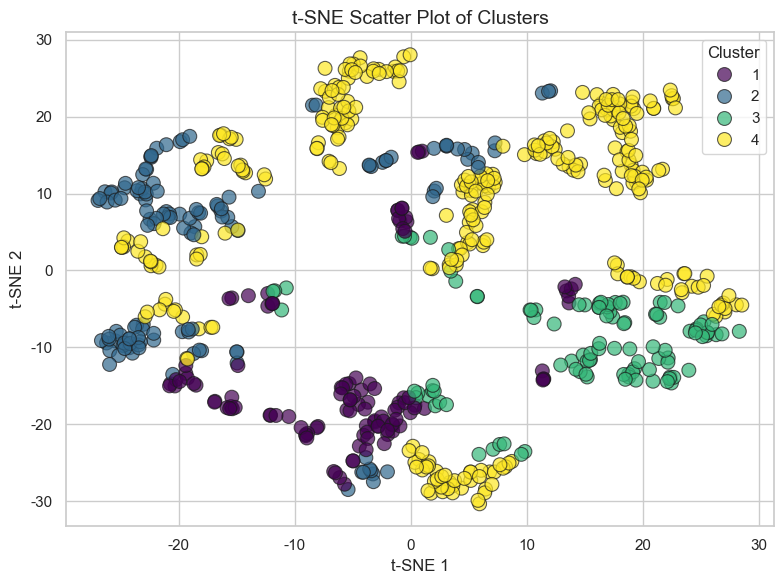

In [54]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.manifold import TSNE
import pandas as pd


# 从数据中提取特征（去掉聚类标签列）
X = df.drop(columns=['Cluster'])

# 进行t-SNE降维，降到2维
tsne = TSNE(n_components=2, random_state=42)
X_tsne = tsne.fit_transform(X)

# 将降维后的数据转换为DataFrame
tsne_df = pd.DataFrame(X_tsne, columns=['t-SNE 1', 't-SNE 2'])
tsne_df['Cluster'] = df['Cluster']  # 将聚类标签添加到DataFrame中

# 设置图表样式
plt.figure(figsize=(8, 6))
sns.set(style="whitegrid")

# 绘制t-SNE散点图，使用聚类标签作为颜色
sns.scatterplot(x='t-SNE 1', y='t-SNE 2', hue='Cluster', data=tsne_df, palette='viridis', s=100, edgecolor='k', alpha=0.7)

# 设置标题和标签
plt.title('t-SNE Scatter Plot of Clusters', fontsize=14)
plt.xlabel('t-SNE 1', fontsize=12)
plt.ylabel('t-SNE 2', fontsize=12)

# 显示图形
plt.tight_layout()
plt.show()
